# 目的  
利用爬蟲方法整理出Commodity中的Crude Oil及Gold每一檔ETF，其每月月底的基金淨值(NAV)。
時間範圍：2015年12月至2018年12月

## STEP1：  
讀取 Crude Oil ETF List 及 Gold ETF List 進行篩選Inception有小於2015/12/31的ETF  
檔案：Crude Oil ETF List (22).csv 及 Gold ETF List (17).csv

In [5]:
#----------資料讀入並進行篩選----------
import pandas as pd
CrudeOilETF= pd.read_csv('Crude Oil ETF List (22).csv') #讀檔
fliter = (CrudeOilETF["Inception"] < '2015-12-31') #Inception條件判斷進行篩選
newCrudeOilETF = CrudeOilETF[fliter] #Crude Oil ETF List篩選結果

GoldETF= pd.read_csv('Gold ETF List (17).csv') #讀檔
fliter = (GoldETF["Inception"] < '2015-12-31') #Inception條件判斷進行篩選
newGoldETF = GoldETF[fliter] #Gold ETF List篩選結果

#將符合的ETF代碼轉換為List
CrudeOilETFList = newCrudeOilETF['Symbol'].values.tolist()
GoldETList = newGoldETF['Symbol'].values.tolist() 

SymbolList = CrudeOilETFList+GoldETList
print(CrudeOilETFList)
print(GoldETList)

['USO', 'UCO', 'DBO', 'SCO', 'USL', 'UWTI', 'DTO', 'DWTI', 'OLO', 'OLEM', 'SZO']
['GLD', 'IAU', 'SGOL', 'OUNZ', 'UGLD', 'DGL', 'UGL', 'DGP', 'GLL', 'DZZ', 'DGLD', 'DGZ', 'UBG']


## STEP2：
進行爬蟲動作  
2015年12月~2018年12月 COMMODITY ETFs 月底基金淨值來源:  
https://www.moneydj.com/etf/x/Basic/ETF/X/xdjbcd/Basic0003BCD.xdjbcd?etfid=+[代號]+&b=+[開始日期]+&c=+[結束日期]

In [6]:
#設置日期範圍
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
start_date = "2015-12-31"
stop_date = "2018-12-31"
start = datetime.strptime(start_date, "%Y-%m-%d")
stop = datetime.strptime(stop_date, "%Y-%m-%d")

In [7]:
import requests
from bs4 import BeautifulSoup as bs

In [8]:
def process_document(document, Symbol, start, stop):
    nodes = document.select('body > p')
    content = nodes[0].get_text().split( )
    arrayDate = content[0].split(',')
    arrayNAV = content[1].split(',')
    data = {'Date':arrayDate,
        Symbol: arrayNAV}
    df = pd.DataFrame.from_dict(data)
    nwedf = pd.DataFrame()
    while start <= stop:
        nwedf = pd.concat([nwedf, df[df["Date"] <= start.strftime('%Y%m%d')].iloc[-1:]], axis=0, ignore_index=True)
        start = start + relativedelta(months=1) #每次增加一個月 
    nwedf.set_index("Date" , inplace=True)    
    return nwedf

In [9]:
all_data = pd.DataFrame()
for Symbol in SymbolList:
    print('start crawling :', Symbol)
    res = requests.get('https://www.moneydj.com/etf/x/Basic/ETF/X/xdjbcd/Basic0003BCD.xdjbcd?etfid='+Symbol+'&b='+start_date+'&c='+stop_date)
    doc = bs(res.text, 'lxml')
    if len(doc):
        data = process_document(doc, Symbol,start,stop)
        all_data = pd.concat([all_data, data], axis=1)
    else:
        print("已下檔")

start crawling : USO
start crawling : UCO
start crawling : DBO
start crawling : SCO
start crawling : USL
start crawling : UWTI
已下檔
start crawling : DTO
start crawling : DWTI
已下檔
start crawling : OLO
start crawling : OLEM
start crawling : SZO
start crawling : GLD
start crawling : IAU
start crawling : SGOL
start crawling : OUNZ
start crawling : UGLD
start crawling : DGL
start crawling : UGL
start crawling : DGP
start crawling : GLL
start crawling : DZZ
start crawling : DGLD
start crawling : DGZ
start crawling : UBG


In [10]:
#呈現COMMODITY ETFs 月底基金淨值的表格
all_data

,USO,UCO,DBO,SCO,USL,DTO,OLO,OLEM,SZO,GLD,...,OUNZ,UGLD,DGL,UGL,DGP,GLL,DZZ,DGLD,DGZ,UBG
Date,,,,,,,,,,,,,,,,,,,,,
20151231,11.0200,25.1550,9.0700,66.6042,17.0000,159.6000,4.6200,14.9200,92.8300,101.6247,...,10.5528,73.7000,34.6900,29.7300,18.1800,115.8800,8.8600,94.7100,17.0900,27.2100
20160129,9.6600,18.9294,7.9900,78.4930,15.8900,198.8800,4.0700,13.6900,104.2300,106.3330,...,11.0417,85.5000,36.4600,32.6300,20.0600,104.7000,7.9400,80.2600,16.2000,28.6500
20160229,8.9900,15.7582,7.4000,79.3905,15.3000,218.7200,3.7600,13.2800,109.4100,118.0686,...,12.2605,113.7000,40.3100,39.9500,24.3000,83.2600,6.2600,57.3500,14.4700,31.7700
20160329,9.7300,17.9306,7.6800,65.0954,16.1700,183.7900,3.9100,14.2400,100.6500,117.1810,...,12.1682,113.3000,40.4100,39.1800,24.4200,83.5600,6.2200,56.1900,14.4300,31.8700
20160429,11.2900,23.5870,8.6300,45.9203,18.4000,124.9500,4.3900,16.4300,84.5000,122.8423,...,12.7560,127.5000,42.1400,42.9000,26.5100,75.4600,5.6800,48.8600,13.8000,33.2900
20160527,11.9500,26.1400,9.1400,40.3043,19.4500,110.2500,4.6500,17.3200,79.5100,116.1742,...,12.0634,105.6000,39.6400,38.2300,23.3900,83.8800,6.3400,58.0200,14.6000,31.3200
20160629,11.9300,25.9366,9.4400,38.5742,19.9300,110.2600,4.8000,17.4600,79.4800,126.1842,...,13.1032,135.5000,43.2200,44.8500,27.6200,70.2300,5.2000,43.6900,13.2800,34.2600
20160729,9.7900,17.2840,8.0700,54.7569,16.9200,152.8900,4.1100,14.4500,94.4300,128.1011,...,13.3018,142.1000,43.9000,46.0700,28.5200,67.9000,5.0400,41.1300,13.0700,34.9000
20160829,10.8700,20.8894,8.8600,43.2492,18.5900,119.5600,4.5100,15.9100,84.1200,125.8390,...,13.0671,132.3000,42.7800,44.3200,27.0700,70.1800,5.2900,43.7600,13.3900,34.0500


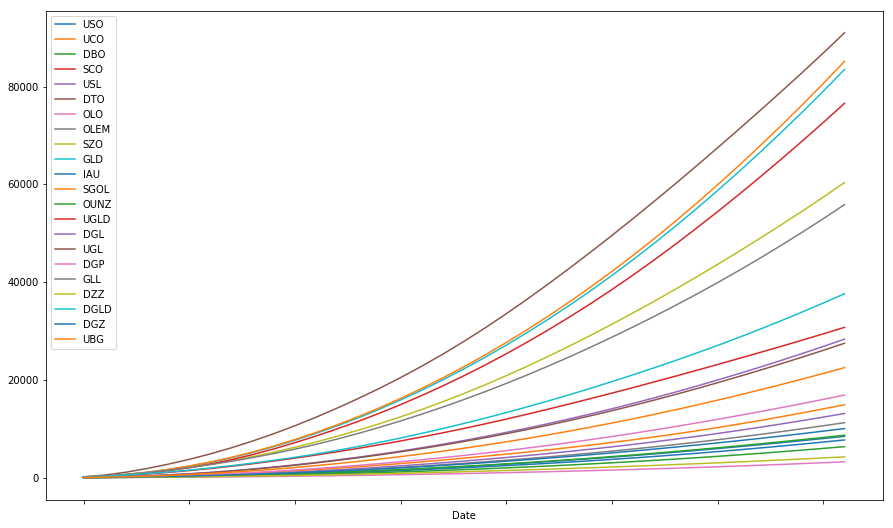

In [15]:
#資料視覺化
all_data = all_data.astype(float)
#all_data = all_data.cumsum()
all_data.plot(figsize=(15,9))

In [14]:
#下載存成.csv檔
all_data.to_csv('COMMODITY_NAV.csv') 